# PyR@TE 3 : Example/Documentation notebook

Before anything else, let's make sure that we are working in PyR@TE's directory.

In [ ]:
%cd .../PyR@TE_3/

## 1. The model file

Let's first take a look at the Standard Model model-file in `models/SM.model`, and explain each part of it.

In [2]:
with open('models/SM.model', 'r') as f:
    print(f.read())

# YAML 1.1
---
Author: Lohan Sartore
Date: 01.04.2020
Name: SM
Groups: {U1Y: U1, SU2L: SU2, SU3c: SU3}

#################################
# Fermions assumed weyl spinors #
#################################

Fermions: {
    Q: {Gen: 3, Qnb:{ U1Y: 1/6, SU2L: 2, SU3c: 3}},
    L: {Gen: 3, Qnb:{ U1Y: -1/2, SU2L: 2, SU3c: 1}},
    uR: {Gen: 3, Qnb:{ U1Y: 2/3, SU2L: 1, SU3c: 3}},
    dR: {Gen: 3, Qnb:{ U1Y: -1/3, SU2L: 1, SU3c: 3}},
    eR: {Gen: 3, Qnb:{ U1Y: -1, SU2L: 1, SU3c: 1}},
}

################
# Real Scalars #
################

RealScalars: {
}

###################
# Complex Scalars #
###################

CplxScalars: {
    H: {RealFields: [Pi, Sigma], Norm: 1/Sqrt(2), Qnb: {U1Y: 1/2, SU2L: 2, SU3c: 1}},
}


Potential: {

Definitions:{
    Htilde[i] : Eps[i,j]*Hbar[j]
},

#########################################
# All particles must be defined above ! #
#########################################

Yukawas:{
    Yu : Qbar[i,a] Htilde[i] uR[a],
    Yd : Qbar[i,a] H[i] dR[a]
    Ye : L

### Gauge groups & Particle content : `GaugeGroups`, `Fermions`, `RealScalars`, `CplxScalars`

The overall syntax is similar to the one in PyR@TE 2. A first difference is that quotation marks are not needed anymore around the various names and quantities. 

For gauge groups : `Groups: {groupName: group, groupName2: group, ...}`

For fermions, we specify the number of generations as well as the quantum numbers under each of the gauge group factors.  

For real scalars (none here), we only need to specify the quantum numbers, either with `S:{Qnb:{ U1Y: x, SU2L: y, SU3c: z}}` or `S:{U1Y: x, SU2L: y, SU3c: z}`.

Complex scalars need to be explicitely defined as the sum of a real and imaginary component. These are defined using the keyword `RealFields: [re, im]`. A value for the norm must be provided as well. In our case, the SM higgs doublet is decomposed as :  
\begin{equation*}
    H = \frac{1}{\sqrt{2}}\left(\Pi + i\,\Sigma\right)
\end{equation*}

Note that the value of the norm has an impact on the final expression of the beta-functions.  

**Important remark :** A difference with PyR@TE 2 is that the anti-particles do not need to be defined in the model file. Anti-particles are automatically defined (except for real scalars, of course) and can be accessed appending 'bar' to the name of the corresponding particle:
`Q -> Qbar`, `H -> Hbar` and so on.

### Writing the Lagrangian :  `Potential`

As in PyR@TE 2, the Lagrangian is defined in the `Potential` section. However, the way the user has to write the Lagrangian has been widely improved in PyR@TE 3, in order to make the syntax as much intuitive and user-friendly as possible. There are two main new features :
1. The various terms are written explicitely, using their mathematical expression and the summation convention for repeated indices.
2. A new section `Definitions` was introduced to define auxiliary quantities useful to write the Lagrangian.  

In our case, we defined the conjugated higgs field (used in the expression of the up-type quark Yukawa coupling) $\tilde{H}^i \equiv \epsilon^{i j} H^*_j$ using the following input : `Htilde[i] : Eps[i,k]*Hbar[k]`. Note that `Eps` followed by $n$ indices is internally interpreted as the Levi-Civita tensor of rank $n$.

Now we are ready to define the various terms of the SM Lagrangian. For instance, in the `Yukawas` section, the up-type Yukawa couplings are written `Yu : Qbar[i,a] Htilde[i] uR[a]`, where `i` is a $SU(2)$ index ranging from 1 to 2, and `a` is the $SU(3)$ color index, ranging from 1 to 3.  

Similarly, the Higgs quartic term is defined as `lambda : (Hbar[i] H[i])**2`. This is a short-hand for the equivalent formulation `lambda : Hbar[i] H[i] Hbar[j] H[j]`.  

The order of the various indices is based on the order in which the non-abelian gauge factors were defined. Here we recall that the groups were defined as `Groups: {U1Y: U1, SU2L: SU2, SU3c: SU3}`, so the indices of `Q` and `Qbar` must be `[i_SU2L, j_SU3C]`. Any inconsistency will be detected by PyR@TE and an appropriate error will be raised (*e.g.* if we are trying to sum two indices of different nature or if the same index appears more than twice).

#### Built-in quantities

Some quantities are automatically available to the user to help him/her build the Lagrangian. The first one, as described above, is the Levi-Civita tensor `Eps`. A second useful possibility is to use the generators of the gauge groups.  

For instance, let us consider a scalar $\delta$ living in the adjoint representation of $SU(2)$. It is convenient to contract this scalar with the generators of the fundamental representation in order to get a $2\times 2$ matrix $\Delta^i_{\ j} \equiv \delta^a\, (t_a)^i_{\ j}$. The matrix $\Delta$ may be defined in the PyR@TE model file using the following steps :
- In `Definitions`, define the generators of the fundamental rep of $SU(2)$ $\rightarrow$ `tfond : t(SU2, 2)`
- Still in `Definitions`, define the matrix $\Delta$ $\rightarrow$ `Delta[i,j] : delta[a] * tfond[a,i,j]`

We see in this example that the standard way to define gauge generators is `name : t(group, rep)`. The object `name` will always carry 3 indices, the first one living in the adjoint representation and the two others living in the representation `rep`.  

Going on with the example, we may also define `DeltaDag : deltabar[a] tfond[a,i,j]` so we are now able to write any term involving the matrix $\Delta$ and its adjoint, such as $\mathrm{Tr}(\Delta^\dagger \Delta) =$`DeltaDag[i,j] Delta[j, i]`.

### [NEW] VeVs running

Another new feature is the running of vacuum-expectation values. This is done in the optional section `Vevs`. The only info to give is the name of the vev and the scalar component it is associated with. In the SM case, the vev is conventionally developped by the second component of the Higgs doublet, and is taken real. Therefore we write `v: Pi[2]`, where `Pi` was defined earlier as the real component of the complex Higgs field.

Since vevs break gauge invariance, the result will be gauge-dependant. The RGEs are computed in a general $R_\xi$ gauge, but the user can fix the gauge (*i.e.* give a value to $\xi$) using the keyword `GaugeParameter`. Here we chose for instance the Feynman gauge $\xi=1$.

### [NEW] Substitutions

A new section `Substitutions` was introduced, where we may ask PyR@TE to substitute some quantities with others **after** the computation of the RGEs is done. There are several ways to take advantage of this new section :
1. **Renaming some couplings**: This is useful for gauge coupling constants, whose names are automatically set to `g_[groupName]` (*e.g.* `g_SU2L`), and may pollute a bit the latex output. We can rename `g_SU2L` to `g2` simply by writing `g_SU2L: g2`.
2. **Apply a GUT normalization**: The syntax in this case is *e.g.* `g1 : sqrt(5/3) * g1`. It is important that the same coupling appears in the left- and right- hand sides. We do not define any new coupling, but simply ask for the substitution $g_1 \rightarrow \sqrt{5/3}\, g_1$ to be performed. In the output latex file, the information that we used some GUT normalization will appear.
3. **Use assumptions on the structure of Yukawa matrices**: In the case of the SM, it is frequent to neglect the off-diagonal components of the Yukawa couplings. It is also frequent to neglect all components but the 3rd generation diagonal coupling. This can be done in the `Substitutions` section. The explicit Yukawa matrices are given in the form of a Python list of lists. For instance, we can define : `Yu: [['y_up', 0, 0], [0, 'y_c', 0], [0, 0, 'y_t']]`, or, equivalently, `Yu: ['y_up', 'y_c', 'y_t']`. It is important to note that the new couplings defined in the right-hand side (`y_up`, `y_c`, `y_t`) are put inside quotation marks. Doing so, we indicate to PyR@TE that these couplings must be defined now, since they weren't defined earlier in the model file. If we wanted to neglect all couplings but the top quark's, we would have written `Yu: [0, 0, 'y_t']`.  
 **Important remark**: Setting a coupling to 0 at some energy scale does **not** prevent it to be radiatively generated at any other energy scale. In other words, some component of a Yukawa matrix which was set to 0 in `Substitutions` can have a non-zero beta-function. In this case, some warning will be displayed in the output latex file so the user is aware of the situation. In the case of the SM, setting the off-diagonal components of all Yukawa matrices to 0 is stable along the RG flow, as well as selecting only the third generation Yukawa couplings.
4. **Define new couplings**: We may for instance want to obtain the beta-functions in terms of the gauge "structure constants" $\alpha_i \equiv g_i^2/(4\pi)$. In this case we may simply define them using *e.g.* `alpha1 : g1**2/(4 pi)`. PyR@TE will internally take care of computing the RGEs of `alpha1` based on that of `g1`, then substituting `g1**2` with `alpha1 * (4 pi)` in every beta function.

### [NEW] Latex substitutions

The last section `Latex` is where we define the Latex expression of all the quantities defined in the model file. This is optional but will definitely help get a nice-looking latex output.  
In principle, for couplings whose names are simple Latex expressions (for instance `g_1` or `Y_u`), the substitution ($g_1$ and $Y_u$) will be performed automatically. However, these automatic replacements may sometimes lead to some unexpected behavior. Therefore, we recommand to avoid the use of Latex names and special characters in the definition of the couplings, and to explicitely define the Latex substitutions in this dedicated section of the model file. This way the user has full control on the Latex ouput.

## 2. Running PyR@TE

As in PyR@TE 2, PyR@TE is run from the command line. In a shell you will have to type `python3 pyR@TE.py [-args]`, where `python3` should be replaced if needed by the correct command or path to a Python3 (&ge; v3.6) executable which is correcty linked to PyR@TE's needed dependencies (Sympy 1.5, numpy, ...).   

The number of possible arguments was reduced compared to the previous version. On the other hand, a configuration file was added where the user can adjust the settings of PyR@TE. Let's take a look at this file, which is called `default.settings` and can be found in PyR@TE's main repository :

In [3]:
with open('default.settings', 'r') as f:
    print(f.read())

#########################################################################
#           This is the default settings file for PyR@TE 3.             #
# Feel free to adjust these settings depending on your usage of PyR@TE. #
#########################################################################
#     Note : if missing, this file will be automatically generated      #
#                 by PyR@TE in its original form                        #
#########################################################################


# Printing

VerboseLevel : Info

# Default folders

ResultsFolder : results/
LogFolder : log/
DisableLogFiles : False

# Computation

DefaultLoopLevel : 1
CheckGaugeInvariance : True
PrintComputationTimes : True

RealBasis : adjoint


# Output

CreateFolder : True
CopyModelFile : False

LatexOutput : True
AbsReplacements : True   #Automatic replacements x*conjugate(x) -> \abs{x}^2
GroupTheoryInfo : True

MathematicaOutput : True
MathematicaSolver : True

PythonOutput : True



#### Default settings

Let us explain some of the settings. The settings in boldface may be overriden with the command-line arguments, as these are *default* settings:  
- `VerboseLevel`: can be set to `Critical` to display only errors and warning messages. The recommanded option is `Info` since it displays a lot of useful info about the progression of the computation.
- **`ResultsFolder`**: The default folder in which the results are saved.
- `LogFolder`: The default folder in which the log files are saved, if enabled.
- **`DefaultLoopLevel`**: The loop-level up to which the RGEs are computed. Possible values for this settings will be discussed below.
- **`CheckGaugeInvariance`**: Can be disabled from the command line. It is recommended to always check the gauge invariance of a newly written model once, and after each modification of the potential !
- `RealBasis`: Possible values are `None` (or `False`) ; `adjoint` and `all`. This will rotate the gauge generators of real representations to some real basis, where the generators are purely imaginary and antisymmetric. For adjoint representations it will also ensure that the identity $(T_a)^i_j = -i\,f_{a\ j}^{\ i}$ is satisfied. Settings this parameter to at least `adjoint` is recommended, since it helps fit the usual conventions used in Particle physics. Setting it to `all` will rotate all real representations to a real basis.
- `CreateFolder`: Create a folder with the name of the model (*e.g.* "`SM/`") to store all output files. If `False` all the files will be put directly in the results folder.
- `CopyModelFile`: copy the model file and put in in the result folder, to keep a trace of how the model file looked like at the time of the computation.
- **`[Latex/Mathematica/Python]Output`**: These can be enable/disabled individually using command line arguments.
- `GroupTheoryInfo`: Add some info about the Lie groups and their representations in the latex output. Also displays the explicit form of the Clebsch-Gordan coefficients used in the expression of the Lagrangian (if any).
- `EndCommands`: Shell commands to be executed after the computation and the exports are done. Useful to convert the .tex file in a pdf on-the-go. The expression `[name]` will be systematically replaced by the name of the model. The commands must be put inside double quotation marks `"` and separated with a comma `,`. Here we compile the .tex file twice.

#### Command-line arguments

| Full name | Short-hand  | Description |
| ------- |-----------| --- |
| `--Model` | `-m`        | Specify the path to the .model file |
| `--Loops` | `-l` | Specify the loop-level of the RGE computation (override the default setting) |
| `--Results` | `-res` | Specify the results folder (override the default setting) |
| `Quiet` | `-q` | Only display warnings and error messages (override the default setting)|
| `--no-KinMix` | `-no-kin` | Disables the effects of abelian kinetic mixing |   

The following arguments are used to enable / disable some behavior. They have the priority over the default settings.  

| Full name | Short-hand  |
| ------- |-----------|
| `--CheckGaugeInvariance` | `-gi` | |
| `--no-CheckGaugeInvariance` | `-no-gi` | |
| `--LatexOutput` | `-tex` |
| `--no-LatexOutput` | `-no-tex` |
| `--MathematicaOutput` | `-math` |
| `--no-MathematicaOutput` | `-no-math` |
| `--PythonOutput` | `-py` | |
| `--no-PythonOutput` | `-no-py` | |


The loop level can be set in several different ways.
- With an integer $n$ : set the loop level to $n$ for all types of couplings (if possible).
- With a python list : **[x,y,z,...]**. The order of the types of couplings is **[Gauge couplings, Yukawas, quartic terms, Trilinear terms, scalar masses, fermion masses, vevs]**.  
 The list may contain 3, 6 or 7 elements. For instance, `-l [3, 2, 1]` will set the running scheme to 3-loop gauge / 2-loop Yukawa / 1-loop quartics. If not provided, the trilinear scalar mass and vev terms will take the loop-level values of the quartics, and the fermion masses that of the Yukawas.  
 Finally, a loop-level of 0 means that the RGEs will not be computed for this kind of couplings.
- With the keyword `max`, *i.e.* `-l max`, to indicate that the computation must be performed at the highest available loop order for each coupling.

Now let's actually run PyR@TE to compute the 2-loop RGEs of the Standard Model. We will ask the result output folder to be created in this notebook's location : `doc/`.

In [4]:
%run pyR@TE.py -m models/SM.model -l 2 -res doc/



             PyR@TE version 3.0-beta1  released  April 8th 2020

       L. Sartore,

       F. Lyonnet, I. Schienbein (version 2)
       and F.Staub, A.Wingerter (version 1)
    Please cite: arXiv:20xx.xxxxx , arXiv:1608.07274 and arXiv:1309.7030


Loading the YAML file: /home/lohan/ownCloud/PyR@TE_3/models/SM.model ... Done.
Loading the model ... Done.
Expanding the Lagrangian ...
     |####################| 100.0%  (0.072 seconds)
Mapping the model onto the general Lagrangian ...
     |####################| 100.0%  (0.011 seconds)
Initializing tensor quantities... Done. (1.959 seconds)
Checking gauge invariance ... All OK ! (2.383 seconds)
Computing the RGES ...
     -> GaugeCouplings
         -> 1-loop
         |##########| 100.0%  (0.004 seconds)
         -> 2-loop
         |##########| 100.0%  (0.016 seconds)
     -> Yukawas
         -> 1-loop
         |##########| 100.0%  (0.018 seconds)
         -> 2-loop
         |##########| 100.0%  (0.379 seconds)
     -> QuarticTerms
     

## 3. PyR@TE Output

### 1. Latex Output

In [5]:
from IPython.display import IFrame
# The path given to IFrame uses the notebook directory as the current working dir.
IFrame("SM/SM.pdf", width=800, height=800)

# If this command is not working, please just go and check the .pdf output manually

### 2. Mathematica output

(If you do not have Mathematica installed in your machine, this output type is probably not of great interest)  

The Mathematica output is a .m file, which contains :
1. The expression of the beta-functions of all the couplings of the model
2. An easy-to-use differential equation solver to run the various couplings. The user needs to provide : the min and max energy scales, the initial scale and the value of the coupling at this initial scale. Running the solver will run the couplings between the min and max scale and plot the results for all the couplings which do not vanish identically over the energy range.

### 3. Python output

When enabled, the python output consists in two files : `[name].py` (here `SM.py`) and `run.py`. These two file are put in a subfolder called `PythonOutput`. The first one contains classes where the couplings and RGEs are defined, as well as RGE solving and plotting functions. In principle the user should not need to modify the content of this file. The second file is used to call the functions defined in the former. Let's take a look at it and import its content within this notebook :

In [6]:
with open('doc/SM/PythonOuput/run.py', 'r') as f:
    print(f.read())

import sys

from SM import RGEsolver

##############################################
# First, create an instance of the RGEsolver #
##############################################

rge = RGEsolver('rge', tmin=0, tmax=20, initialScale=0)


##########################################################
# We fix the running scheme and initial conditions below #
##########################################################

# Running scheme :

rge.loops = {'GaugeCouplings': 2,
             'Yukawas': 2,
             'QuarticTerms': 2,
             'ScalarMasses': 2,
             'Vevs': 2}

# Gauge Couplings

rge.g1.initialValue = 0
rge.g2.initialValue = 0
rge.g3.initialValue = 0

# Yukawa Couplings

rge.yt.initialValue = 0
rge.yb.initialValue = 0
rge.ytau.initialValue = 0

# Quartic Couplings

rge.lambda_.initialValue = 0

# Scalar Mass Couplings

rge.mu.initialValue = 0

# Vacuum-expectation Values

rge.v.initialValue = 0


############################
# Solve the system of RGEs #
##############

To load the file in the notebook, we used the command `%load 'doc/SM/PythonOuput/run.py'` below. The following steps are performed :
1. **Load the solver**, and provide it with a name (must be the same as the name of the solver, here `'rge'`) ; min and max energy scales ; and an initial scale at which the couplings will take their initial values.
2. **Set the loop-levels** (setting them to higher values than the loop-level of the PyR@TE run will have no effect)
3. **Set the initial values**
4. **Solve the RGEs** : The function `solve` can take either the argument `step` which defines the precision of the iterative differential solver (in units of Log10(GeV)) **or** the argument `Npoints`, which gives the number of integration points.
5. Finally, **plot the results**. Here are the options taken by the plot() function, along with their default values:
    - `figSize=(600, 600)` : The figure dimensions in pixels.
    - `subPlots=True` : If True, plot all the various couplings in the same window, with one subplot per type of coupling. If False, produce one figure by coupling type.
    - `which=None` : The user may want to plot only one or several types of couplings. Usage:  
      > `which='GaugeCouplings'`  
      > `which=('GaugeCouplings', 'QuarticTerms')`
    - `whichNot=None` : Which coupling types are NOT to be plotted. Same usage as which.
    - `printLoopLevel=True/False` : The loop-levels of the computation are displayed in the title of the plots.

In [7]:
from numpy import sqrt, pi

Let's provide the solver with realistic initial conditions : 

System of RGEs solved in 0.080 seconds.


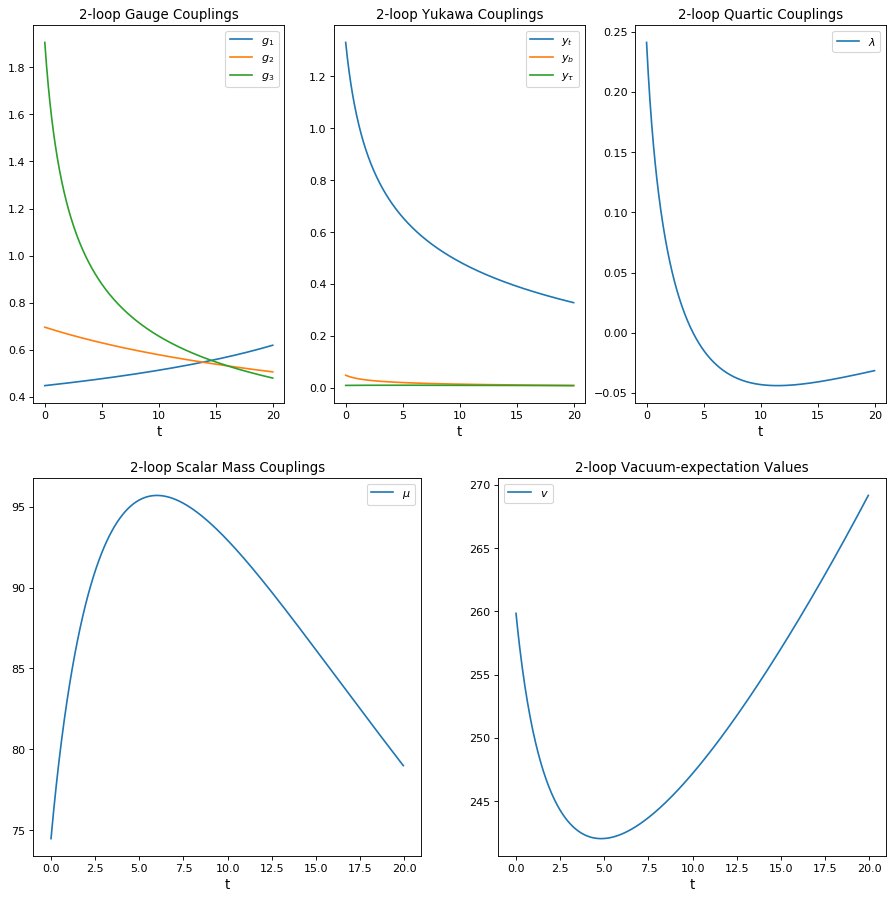

In [8]:
# %load 'doc/SM/PythonOuput/run.py'
import sys

from SM import RGEsolver

##############################################
# First, create an instance of the RGEsolver #
##############################################
        
rge = RGEsolver('rge', tmin=0, tmax=20, initialScale=1.9)


##########################################################
# We fix the running scheme and initial conditions below #
##########################################################

# Running scheme :

rge.loops = {'GaugeCouplings': 2,
             'Yukawas': 2,
             'QuarticTerms': 2,
             'ScalarMasses': 2,
             'Vevs': 2}

# Gauge Couplings

rge.g1.initialValue = sqrt(4*pi/128 / (1-.22)) * sqrt(5/3)
rge.g2.initialValue = sqrt(4*pi/128 / .22)
rge.g3.initialValue = sqrt(4*pi*.12)

# Yukawa Couplings

rge.yt.initialValue = .9
rge.yb.initialValue = .03
rge.ytau.initialValue = .01

# Quartic Couplings

rge.lambda_.initialValue = 0.13/2

# Scalar Mass Couplings


rge.mu.initialValue = sqrt(.13) * 246

# Vacuum-expectation Values

rge.v.initialValue = 246


############################
# Solve the system of RGEs #
############################

rge.solve(step = .05)

# Another way to call rge.solve() :
# rge.solve(Npoints = 500)

####################
# Plot the results #
####################

rge.plot(figSize=(1100, 1000), subPlots=True, printLoopLevel=True)



If the user needs to access the numerical values of the running couplings, he/she simply needs to read them from the `solutions` dictionary. For instance:

In [9]:
energyValues = rge.tList
lambdaValues = rge.solutions['lambda_']

print(energyValues[:20], '\n')
print(lambdaValues[:20])

[-1.2073675392798577e-15, 0.049999999999998795, 0.0999999999999988, 0.1499999999999988, 0.1999999999999988, 0.24999999999999878, 0.29999999999999877, 0.34999999999999876, 0.39999999999999875, 0.44999999999999873, 0.4999999999999987, 0.5499999999999987, 0.5999999999999988, 0.6499999999999988, 0.6999999999999988, 0.7499999999999989, 0.7999999999999989, 0.849999999999999, 0.899999999999999, 0.9499999999999991] 

[0.24120233521254922, 0.2319185655134477, 0.2231578215711789, 0.2148724324469653, 0.20702154459569874, 0.19956804074478485, 0.19247947383990013, 0.18572711314374704, 0.17928498867368617, 0.17313016628994568, 0.1672419179779195, 0.16160149705166024, 0.15619219836370532, 0.15099864790447054, 0.1460069774352467, 0.1412046233276697, 0.1365799918127543, 0.13212256221141347, 0.12782267591859917, 0.12367140995500571]
